In [1]:
import numpy as np
import sympy as smp
from scipy.integrate import odeint
import matplotlib.pyplot as plt
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter
from IPython.display import HTML

In [2]:
#Define all symbols using sympy
t, g = smp.symbols('t g')
m1, m2 = smp.symbols('m1 m2')
L1, L2 = smp.symbols('L1 L2')
#Once defined we can easily use sympy to do operations on these values

In [3]:
the1, the2 = smp.symbols(r'\theta_1, \theta2', cls=smp.Function)

In [4]:
the1 = the1(t)
the2 = the2(t)

In [5]:
the1 #When we use the function, it ensures that the theta
#values are written in funciton notation, indicating it relies on some other value


\theta_1(t)

In [6]:
#Derivatives and second derivatives
the1_d = smp.diff(the1, t)
the2_d = smp.diff(the2, t)
the1_dd = smp.diff(the1_d, t)
the2_dd = smp.diff(the2_d, t)

In [7]:
# Define x1, y1, x2, y2 written in terms of the parameters above
x1 = L1+smp.sin(the1)
y1 = -L1*smp.cos(the1)
x2 = L1*smp.sin(the1) + L2 * smp.sin(the2)
y2 = -L1*smp.cos(the1) - L2 + smp.cos(the2)

In [8]:
x1 ##WOOO HOW EXCITING AND FUN ITS WRITTEN AS A FUNCTION THANKS SYMPY

L1 + sin(\theta_1(t))

In [9]:
# Then use these to define kinetic and potential energy for each mass. Obtain the Lagrangian

#Kinetic
T1 = 1/2 * m1 * (smp.diff(x1, t)**2 + smp.diff(y1,t)**2)
T2 = 1/2 * m2 * (smp.diff(x2, t)**2 + smp.diff(y2, t)**2)
T = T1+T2

# Potential 
V1 = m1*g*y1
V2 = m2*g*y2
V = V1 + V2
# Lagrangion
L = T-V

In [10]:
L #YAHHH MATH WE LOVE TO SEE IT

L1*g*m1*cos(\theta_1(t)) - g*m2*(-L1*cos(\theta_1(t)) - L2 + cos(\theta2(t))) + 0.5*m1*(L1**2*sin(\theta_1(t))**2*Derivative(\theta_1(t), t)**2 + cos(\theta_1(t))**2*Derivative(\theta_1(t), t)**2) + 0.5*m2*((L1*sin(\theta_1(t))*Derivative(\theta_1(t), t) - sin(\theta2(t))*Derivative(\theta2(t), t))**2 + (L1*cos(\theta_1(t))*Derivative(\theta_1(t), t) + L2*cos(\theta2(t))*Derivative(\theta2(t), t))**2)

In [11]:
LE1 = smp.diff(L, the1) - smp.diff(smp.diff(L, the1_d), t).simplify()
LE2 = smp.diff(L, the2) - smp.diff(smp.diff(L, the2_d), t).simplify()

In [12]:
# Solve Lagranges equations (this assumes that LE1 and LE2 are both equal to zero)

sols = smp.solve([LE1, LE2], (the1_dd, the2_dd), simplify=False, rational=False)

In [13]:
sols[the1_dd] ##OH BOY THATS A DOOZY

1.0*L1**2*L2**2*m1*sin(\theta_1(t))*cos(\theta2(t))**2*cos(\theta_1(t))*Derivative(\theta_1(t), t)**2/(1.0*L1**2*L2**2*m1*sin(\theta_1(t))**2*cos(\theta2(t))**2 - 1.0*L1**2*L2**2*m2*cos(\theta2(t))**2*cos(\theta_1(t))**2 + 1.0*L1**2*L2**2*m2*cos(\theta2(t))**2 + 2.0*L1**2*L2*m2*sin(\theta2(t))*sin(\theta_1(t))*cos(\theta2(t))*cos(\theta_1(t)) + 1.0*L1**2*m1*sin(\theta2(t))**2*sin(\theta_1(t))**2 - 1.0*L1**2*m2*sin(\theta2(t))**2*sin(\theta_1(t))**2 + 1.0*L1**2*m2*sin(\theta2(t))**2 + 1.0*L2**2*m1*cos(\theta2(t))**2*cos(\theta_1(t))**2 + 1.0*m1*sin(\theta2(t))**2*cos(\theta_1(t))**2) - 1.0*L1**2*L2**2*m1*sin(2*\theta_1(t))*cos(\theta2(t))**2*Derivative(\theta_1(t), t)**2/(1.0*L1**2*L2**2*m1*sin(\theta_1(t))**2*cos(\theta2(t))**2 - 1.0*L1**2*L2**2*m2*cos(\theta2(t))**2*cos(\theta_1(t))**2 + 1.0*L1**2*L2**2*m2*cos(\theta2(t))**2 + 2.0*L1**2*L2*m2*sin(\theta2(t))*sin(\theta_1(t))*cos(\theta2(t))*cos(\theta_1(t)) + 1.0*L1**2*m1*sin(\theta2(t))**2*sin(\theta_1(t))**2 - 1.0*L1**2*m2*sin(\thet

In [14]:
##smp.lambdify allows us to take the expressions from above and actually get values in return.
dz1dt_f = smp.lambdify((t, g, m1, m2, L1, L2, the1, the2, the1_d, the2_d), sols[the1_dd])
dz2dt_f = smp.lambdify((t, g, m1, m2, L1, L2, the1, the2, the1_d, the2_d), sols[the2_dd])
dthe1dt_f = smp.lambdify(the1_d, the1_d)
dthe2dt_f = smp.lambdify(the2_d, the2_d)

In [15]:
# Now define vector S = (the1, z1, the2, z2) If we're going to use and ODE solver in python we need to write
# dS/dt. In other words, we need to define dS.dt(S,t)

def dSdt(S, t, g, m1, m2, L1, L2):
    the1, z1, the2, z2 = S
    return[
        dthe1dt_f(z1),
        dz1dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2),
        dthe2dt_f(z2),
                 dz2dt_f(t, g, m1, m2, L1, L2, the1, the2, z1, z2)
    ]

In [16]:
#Solve the system of ODEs using scipys odeint method
t = np.linspace(0, 40, 1001)
g = 9.81
m1 = 2
m2 = 1
L1 = 2
L2 = 1
ans = odeint(dSdt, y0=[1, -3, -1, 5], t=t, args=(g, m1, m2, L1, L2))

In [17]:
len(t[t<1]) #There are 25 points in each second. So 25/frames a second which is important when 
#animating

25

In [18]:
ans.T

array([[  1.        ,   0.87205714,   0.72540914, ...,   0.56376371,
          0.41912941,   0.26663492],
       [ -3.        ,  -3.41307593,  -3.94172045, ...,  -3.49124151,
         -3.73221352,  -3.86233094],
       [ -1.        ,  -0.78997494,  -0.55051781, ..., -11.33544597,
        -11.27733752, -11.16251165],
       [  5.        ,   5.55382743,   6.49669299, ...,   0.81232398,
          2.12963749,   3.63611906]])

In [19]:
#This will transpose the matrix
#We can collect theta values from here
the1 = ans.T[0]
the2 = ans.T[2]

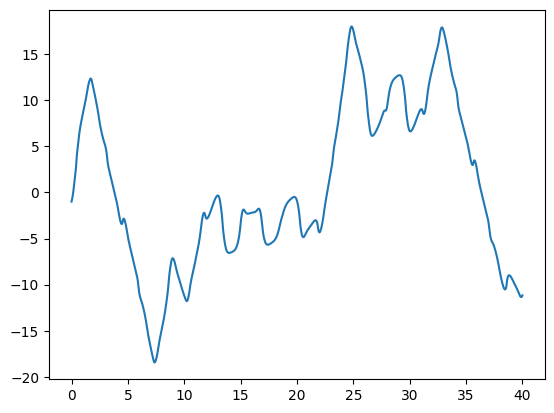

In [20]:
plt.plot(t, the2)

In [21]:
def get_x1y1x2y2(t, the1, the2, L1, L2):
    return (L1*np.sin(the1),
           -L1*np.cos(the1),
           L1*np.sin(the1) + L2*np.sin(the2),
           -L1*np.cos(the1) - L2*np.cos(the2))
x1, y1, x2, y2 = get_x1y1x2y2(t, ans.T[0], ans.T[2], L1,L2)



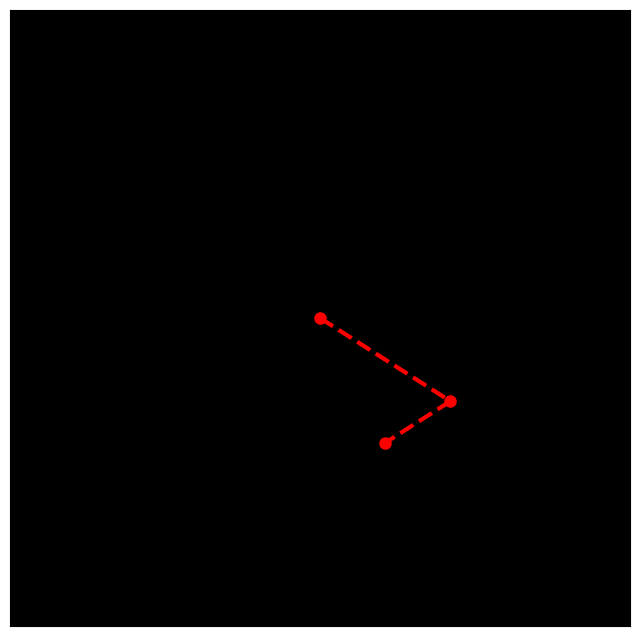

In [22]:
def animate(i):
    # Update pendulum position
    ln1.set_data([0, x1[i], x2[i]], [0, y1[i], y2[i]])
    
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.set_facecolor('k')
ax.get_xaxis().set_ticks([])    # enable this to hide x axis ticks
ax.get_yaxis().set_ticks([])    # enable this to hide y axis ticks
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
ax.set_ylim(-4,4)
ax.set_xlim(-4,4)
ani = animation.FuncAnimation(fig, animate, frames=1000, interval=50)
ani.save('pen.gif',writer='pillow',fps=25)

In [23]:
HTML('<img src="./pen.gif" />')